In [0]:
import pandas as pd

In [0]:
!ls 'drive/My Drive/data'

bank.csv		megaline		  telecom_practicum
credit_scoring_eng.csv	ml-20m
ecommerce-data.zip	real_estate_data_eng.csv


In [0]:
df = pd.read_csv('drive/My Drive/data/ecommerce-data.zip',encoding = "cp1252")

In [0]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [0]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [0]:
df['CustomerID'].fillna('unknown',inplace=True)
df['CustomerID'] = df['CustomerID'].astype(str)

In [0]:
df['InvoiceDate'][0]

'12/1/2010 8:26'

In [0]:
pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M' )

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [0]:
df['date'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M' )

In [0]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,2011-12-01,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,2011-12-01,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011-12-01,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011-12-01,16.60


In [0]:
df['date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: date, Length: 541909, dtype: int64

In [0]:
df['month'] = df['date'].values.astype('datetime64[M]')

In [0]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,2011-12-01,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,2011-12-01,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011-12-01,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,2011-12-01,16.60


In [0]:
df.groupby('month')[['UnitPrice','Quantity']].agg('sum').sort_values('month')

,UnitPrice,Quantity
month,,
2010-12-01,260520.850,342228
2011-01-01,172752.800,308966
2011-02-01,127448.770,277989
2011-03-01,171486.510,351872
2011-04-01,129164.961,289098
2011-05-01,190685.460,380391
2011-06-01,200717.340,341623
2011-07-01,171906.791,391116
2011-08-01,150385.680,406199


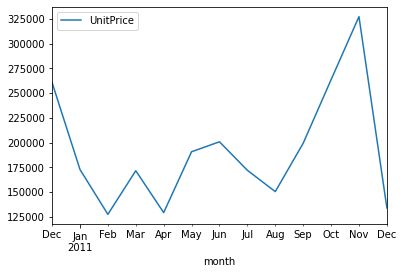

In [0]:
df.groupby('month')[['UnitPrice']].sum().sort_values('month').plot()

In [0]:
c = df.groupby(['month','CustomerID'])[['UnitPrice','Quantity']].agg('sum').reset_index()

In [0]:
len(c)

13688

In [0]:
c

,month,CustomerID,UnitPrice,Quantity
0,2010-12-01,12347.0,89.59,319
1,2010-12-01,12348.0,49.60,1254
2,2010-12-01,12370.0,263.38,968
3,2010-12-01,12377.0,90.57,604
4,2010-12-01,12383.0,49.03,754
...,...,...,...,...
13683,2011-12-01,18272.0,49.64,254
13684,2011-12-01,18273.0,2.55,20
13685,2011-12-01,18282.0,23.52,28
13686,2011-12-01,18283.0,65.38,142


In [0]:
c[c['CustomerID'] == 18245.0]

,month,CustomerID,UnitPrice,Quantity


In [0]:
user = pd.DataFrame({'CustomerID':df['CustomerID'].unique()})

In [0]:
user = df.groupby('CustomerID')['month'].min().to_frame().reset_index()

In [0]:
user.columns

Index(['CustomerID', 'month'], dtype='object')

In [0]:
user.columns = ['CustomerID', 'reg_month']

In [0]:
user

,CustomerID,reg_month
0,12346.0,2011-01-01
1,12347.0,2010-12-01
2,12348.0,2010-12-01
3,12349.0,2011-11-01
4,12350.0,2011-02-01
...,...,...
4368,18281.0,2011-06-01
4369,18282.0,2011-08-01
4370,18283.0,2011-01-01
4371,18287.0,2011-05-01


In [0]:
month = pd.DataFrame({'month': pd.date_range('2010-12-01','2011-12-01',freq='MS')})

In [0]:
month

,month
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01
5,2011-05-01
6,2011-06-01
7,2011-07-01
8,2011-08-01
9,2011-09-01


In [0]:
len(user) * len(month)

56849

In [0]:
user['key'] = 1
month['key'] = 1

In [0]:
user

,CustomerID,reg_month,key
0,12346.0,2011-01-01,1
1,12347.0,2010-12-01,1
2,12348.0,2010-12-01,1
3,12349.0,2011-11-01,1
4,12350.0,2011-02-01,1
...,...,...,...
4368,18281.0,2011-06-01,1
4369,18282.0,2011-08-01,1
4370,18283.0,2011-01-01,1
4371,18287.0,2011-05-01,1


In [0]:
month

,month,key
0,2010-12-01,1
1,2011-01-01,1
2,2011-02-01,1
3,2011-03-01,1
4,2011-04-01,1
5,2011-05-01,1
6,2011-06-01,1
7,2011-07-01,1
8,2011-08-01,1
9,2011-09-01,1


In [0]:
report = user.merge(month,on='key').drop('key',axis=1)

In [0]:
len(user) * len(month)

56849

In [0]:
report

,CustomerID,reg_month,month
0,12346.0,2011-01-01,2010-12-01
1,12346.0,2011-01-01,2011-01-01
2,12346.0,2011-01-01,2011-02-01
3,12346.0,2011-01-01,2011-03-01
4,12346.0,2011-01-01,2011-04-01
...,...,...,...
56844,unknown,2010-12-01,2011-08-01
56845,unknown,2010-12-01,2011-09-01
56846,unknown,2010-12-01,2011-10-01
56847,unknown,2010-12-01,2011-11-01


In [0]:
report = report[report['month'] >= report['reg_month']].copy()

In [0]:
report

,CustomerID,reg_month,month
1,12346.0,2011-01-01,2011-01-01
2,12346.0,2011-01-01,2011-02-01
3,12346.0,2011-01-01,2011-03-01
4,12346.0,2011-01-01,2011-04-01
5,12346.0,2011-01-01,2011-05-01
...,...,...,...
56844,unknown,2010-12-01,2011-08-01
56845,unknown,2010-12-01,2011-09-01
56846,unknown,2010-12-01,2011-10-01
56847,unknown,2010-12-01,2011-11-01


In [0]:
report[report['CustomerID'] == 12348.0 ]

,CustomerID,reg_month,month


In [0]:
df[df['CustomerID'] == 12348.0]['month'].unique()

array([], dtype='datetime64[ns]')

In [0]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34


In [0]:
df[df['InvoiceNo'] == '536365']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,25.50


In [0]:
df['revenue'] = df['UnitPrice'] * df['Quantity']

In [0]:
df[df['InvoiceNo'] == '536365']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,25.50


In [0]:
sales_month = df.groupby(['month','CustomerID'])[['revenue']].agg('sum').reset_index()

In [0]:
sales_month

,month,CustomerID,revenue
0,2010-12-01,12347.0,711.79
1,2010-12-01,12348.0,892.80
2,2010-12-01,12370.0,1868.02
3,2010-12-01,12377.0,1001.52
4,2010-12-01,12383.0,600.72
...,...,...,...
13683,2011-12-01,18272.0,367.88
13684,2011-12-01,18273.0,51.00
13685,2011-12-01,18282.0,77.84
13686,2011-12-01,18283.0,208.00


In [0]:
report

,CustomerID,reg_month,month
1,12346.0,2011-01-01,2011-01-01
2,12346.0,2011-01-01,2011-02-01
3,12346.0,2011-01-01,2011-03-01
4,12346.0,2011-01-01,2011-04-01
5,12346.0,2011-01-01,2011-05-01
...,...,...,...
56844,unknown,2010-12-01,2011-08-01
56845,unknown,2010-12-01,2011-09-01
56846,unknown,2010-12-01,2011-10-01
56847,unknown,2010-12-01,2011-11-01


In [0]:
sales_month

,month,CustomerID,revenue
0,2010-12-01,12347.0,711.79
1,2010-12-01,12348.0,892.80
2,2010-12-01,12370.0,1868.02
3,2010-12-01,12377.0,1001.52
4,2010-12-01,12383.0,600.72
...,...,...,...
13683,2011-12-01,18272.0,367.88
13684,2011-12-01,18273.0,51.00
13685,2011-12-01,18282.0,77.84
13686,2011-12-01,18283.0,208.00


In [0]:
sales_month.groupby('month')['revenue'].sum()

month
2010-12-01     748957.020
2011-01-01     560000.260
2011-02-01     498062.650
2011-03-01     683267.080
2011-04-01     493207.121
2011-05-01     723333.510
2011-06-01     691123.120
2011-07-01     681300.111
2011-08-01     682680.510
2011-09-01    1019687.622
2011-10-01    1070704.670
2011-11-01    1461756.250
2011-12-01     433668.010
Name: revenue, dtype: float64

In [0]:
sales_month['revenue'].sum()

9747747.934000023

In [0]:
df['revenue'].sum()

9747747.933999998

In [0]:
df.isna().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
date           0.000000
month          0.000000
revenue        0.000000
dtype: float64

In [0]:
df.groupby('month')['revenue'].sum().reset_index().sort_values('month')

,month,revenue
0,2010-12-01,748957.020
1,2011-01-01,560000.260
2,2011-02-01,498062.650
3,2011-03-01,683267.080
4,2011-04-01,493207.121
5,2011-05-01,723333.510
6,2011-06-01,691123.120
7,2011-07-01,681300.111
8,2011-08-01,682680.510
9,2011-09-01,1019687.622


In [0]:
report = report.merge(sales_month,how='left',on=['month','CustomerID']).copy()

In [0]:
report

,CustomerID,reg_month,month,revenue
0,12346.0,2011-01-01,2011-01-01,0.00
1,12346.0,2011-01-01,2011-02-01,NaN
2,12346.0,2011-01-01,2011-03-01,NaN
3,12346.0,2011-01-01,2011-04-01,NaN
4,12346.0,2011-01-01,2011-05-01,NaN
...,...,...,...,...
37444,unknown,2010-12-01,2011-08-01,66312.51
37445,unknown,2010-12-01,2011-09-01,88247.25
37446,unknown,2010-12-01,2011-10-01,96101.08
37447,unknown,2010-12-01,2011-11-01,329348.51


In [0]:
report[report['CustomerID'] == 12348.0]

,CustomerID,reg_month,month,revenue


In [0]:
report['user'] = 1

In [0]:
report

,CustomerID,reg_month,month,revenue,user
0,12346.0,2011-01-01,2011-01-01,0.00,1
1,12346.0,2011-01-01,2011-02-01,NaN,1
2,12346.0,2011-01-01,2011-03-01,NaN,1
3,12346.0,2011-01-01,2011-04-01,NaN,1
4,12346.0,2011-01-01,2011-05-01,NaN,1
...,...,...,...,...,...
37444,unknown,2010-12-01,2011-08-01,66312.51,1
37445,unknown,2010-12-01,2011-09-01,88247.25,1
37446,unknown,2010-12-01,2011-10-01,96101.08,1
37447,unknown,2010-12-01,2011-11-01,329348.51,1


In [0]:
report.groupby('month')[['user']].agg('sum')

,user
month,
2010-12-01,949
2011-01-01,1370
2011-02-01,1750
2011-03-01,2190
2011-04-01,2489
2011-05-01,2768
2011-06-01,3003
2011-07-01,3194
2011-08-01,3361


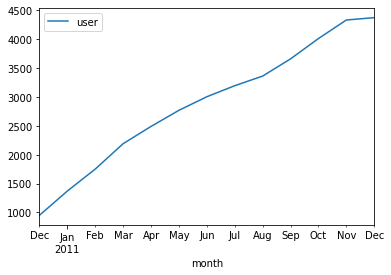

In [0]:
report.groupby('month')[['user']].agg('sum').plot()

In [0]:
report

,CustomerID,reg_month,month,revenue,user
0,12346.0,2011-01-01,2011-01-01,0.00,1
1,12346.0,2011-01-01,2011-02-01,NaN,1
2,12346.0,2011-01-01,2011-03-01,NaN,1
3,12346.0,2011-01-01,2011-04-01,NaN,1
4,12346.0,2011-01-01,2011-05-01,NaN,1
...,...,...,...,...,...
37444,unknown,2010-12-01,2011-08-01,66312.51,1
37445,unknown,2010-12-01,2011-09-01,88247.25,1
37446,unknown,2010-12-01,2011-10-01,96101.08,1
37447,unknown,2010-12-01,2011-11-01,329348.51,1


In [0]:
report['active'] = (report['revenue'] > 0) * 1

In [0]:
report

,CustomerID,reg_month,month,revenue,user,active
0,12346.0,2011-01-01,2011-01-01,0.00,1,0
1,12346.0,2011-01-01,2011-02-01,NaN,1,0
2,12346.0,2011-01-01,2011-03-01,NaN,1,0
3,12346.0,2011-01-01,2011-04-01,NaN,1,0
4,12346.0,2011-01-01,2011-05-01,NaN,1,0
...,...,...,...,...,...,...
37444,unknown,2010-12-01,2011-08-01,66312.51,1,1
37445,unknown,2010-12-01,2011-09-01,88247.25,1,1
37446,unknown,2010-12-01,2011-10-01,96101.08,1,1
37447,unknown,2010-12-01,2011-11-01,329348.51,1,1


In [0]:
r = report.groupby('month')[['user','active','revenue']].agg('sum').reset_index()

In [0]:
r['active_%'] = r['active'] / r['user']

In [0]:
r

,month,user,active,revenue,active_%
0,2010-12-01,949,882,748957.020,0.929399
1,2011-01-01,1370,737,560000.260,0.537956
2,2011-02-01,1750,754,498062.650,0.430857
3,2011-03-01,2190,969,683267.080,0.442466
4,2011-04-01,2489,851,493207.121,0.341904
5,2011-05-01,2768,1053,723333.510,0.380419
6,2011-06-01,3003,987,691123.120,0.328671
7,2011-07-01,3194,943,681300.111,0.295241
8,2011-08-01,3361,931,682680.510,0.277001
9,2011-09-01,3659,1263,1019687.622,0.345176


In [0]:
r

,month,user,active,revenue,active_%
0,2010-12-01,949,882,748957.020,0.929399
1,2011-01-01,1370,737,560000.260,0.537956
2,2011-02-01,1750,754,498062.650,0.430857
3,2011-03-01,2190,969,683267.080,0.442466
4,2011-04-01,2489,851,493207.121,0.341904
5,2011-05-01,2768,1053,723333.510,0.380419
6,2011-06-01,3003,987,691123.120,0.328671
7,2011-07-01,3194,943,681300.111,0.295241
8,2011-08-01,3361,931,682680.510,0.277001
9,2011-09-01,3659,1263,1019687.622,0.345176


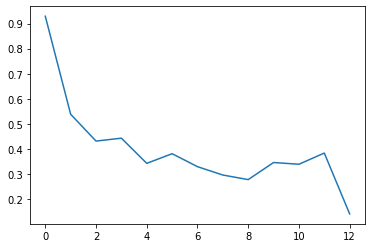

In [0]:
r['active_%'].plot()

In [0]:
report.head()

,CustomerID,reg_month,month,revenue,user,active
0,12346.0,2011-01-01,2011-01-01,0.0,1,0
1,12346.0,2011-01-01,2011-02-01,NaN,1,0
2,12346.0,2011-01-01,2011-03-01,NaN,1,0
3,12346.0,2011-01-01,2011-04-01,NaN,1,0
4,12346.0,2011-01-01,2011-05-01,NaN,1,0


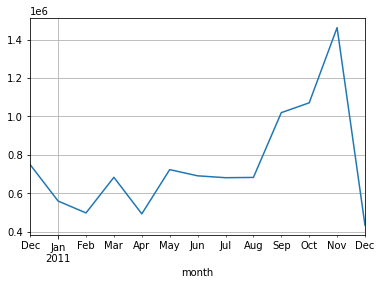

In [0]:
r.set_index('month')['revenue'].plot(grid=True)

In [0]:
1.4e6

1400000.0

In [0]:
r

,month,user,active,revenue,active_%
0,2010-12-01,949,882,748957.020,0.929399
1,2011-01-01,1370,737,560000.260,0.537956
2,2011-02-01,1750,754,498062.650,0.430857
3,2011-03-01,2190,969,683267.080,0.442466
4,2011-04-01,2489,851,493207.121,0.341904
5,2011-05-01,2768,1053,723333.510,0.380419
6,2011-06-01,3003,987,691123.120,0.328671
7,2011-07-01,3194,943,681300.111,0.295241
8,2011-08-01,3361,931,682680.510,0.277001
9,2011-09-01,3659,1263,1019687.622,0.345176
